In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
# Load the TSV file
df = pd.read_csv("daplab.tsv", sep='\t')

# Display the first few rows
df.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# Dataset overview
df.info()

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create a column for review length (word count)
df['review_length'] = df['verified_reviews'].apply(lambda x: len(str(x).split()))

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3149 non-null   object        
 4   feedback          3150 non-null   int64         
 5   review_length     3150 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 147.8+ KB


rating              0
date                0
variation           0
verified_reviews    1
feedback            0
review_length       0
dtype: int64

In [7]:
df.describe(include='all')


,rating,date,variation,verified_reviews,feedback,review_length
count,3150.000000,3150,3150,3149,3150.000000,3150.000000
unique,NaN,NaN,16,2300,NaN,NaN
top,NaN,NaN,Black Dot,,NaN,NaN
freq,NaN,NaN,516,79,NaN,NaN
mean,4.463175,2018-07-24 02:39:05.142857472,NaN,NaN,0.918413,25.293016
min,1.000000,2018-05-16 00:00:00,NaN,NaN,0.000000,0.000000
25%,4.000000,2018-07-28 00:00:00,NaN,NaN,1.000000,6.000000
50%,5.000000,2018-07-30 00:00:00,NaN,NaN,1.000000,14.000000
75%,5.000000,2018-07-30 00:00:00,NaN,NaN,1.000000,32.000000
max,5.000000,2018-07-31 00:00:00,NaN,NaN,1.000000,526.000000


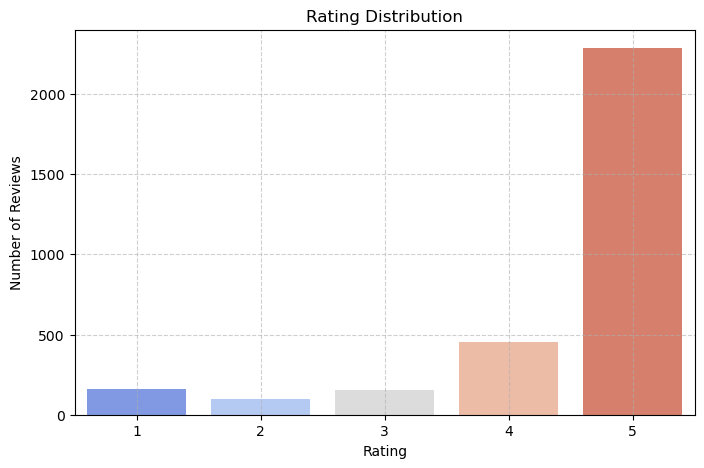

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df, palette='coolwarm')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


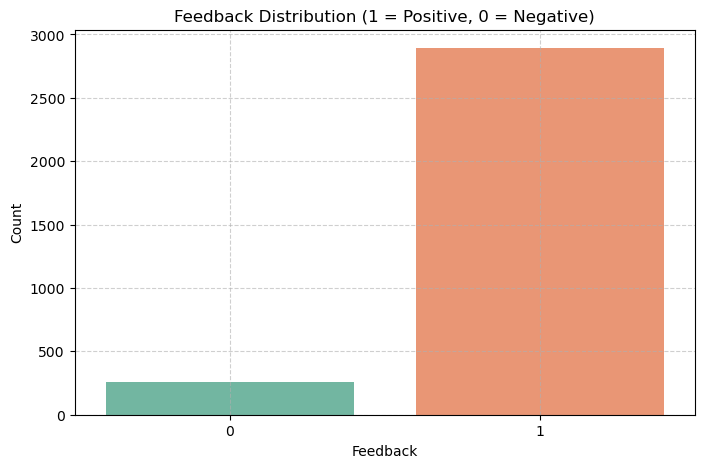

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='feedback', data=df, palette='Set2')
plt.title('Feedback Distribution (1 = Positive, 0 = Negative)')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


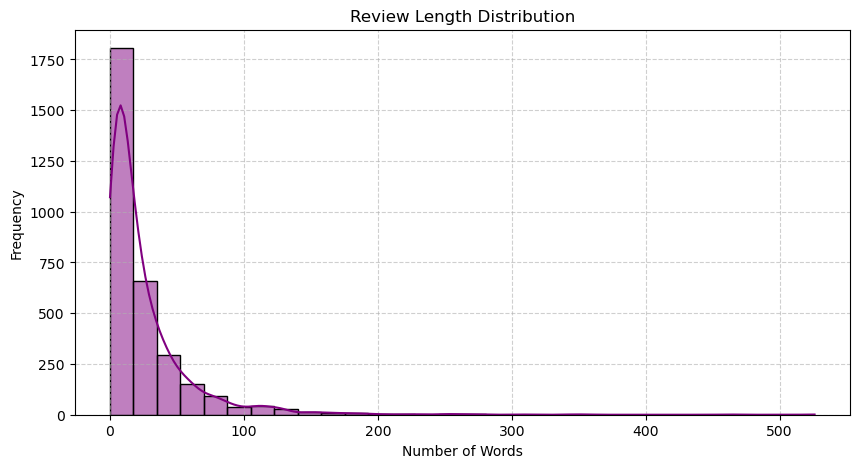

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['review_length'], bins=30, kde=True, color='purple')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [11]:
variation_stats = df.groupby('variation').agg(
    review_count=('rating', 'count'),
    avg_rating=('rating', 'mean'),
    avg_feedback=('feedback', 'mean')
).sort_values(by='review_count', ascending=False).head(10)

variation_stats.reset_index(inplace=True)
variation_stats


,variation,review_count,avg_rating,avg_feedback
0,Black Dot,516,4.453488,0.930233
1,Charcoal Fabric,430,4.730233,0.972093
2,Configuration: Fire TV Stick,350,4.591429,0.920000
3,Black Plus,270,4.370370,0.896296
4,Black Show,265,4.490566,0.932075
5,Black,261,4.233716,0.865900
6,Black Spot,241,4.311203,0.867220
7,White Dot,184,4.423913,0.934783
8,Heather Gray Fabric,157,4.694268,0.987261
9,White Spot,109,4.311927,0.889908


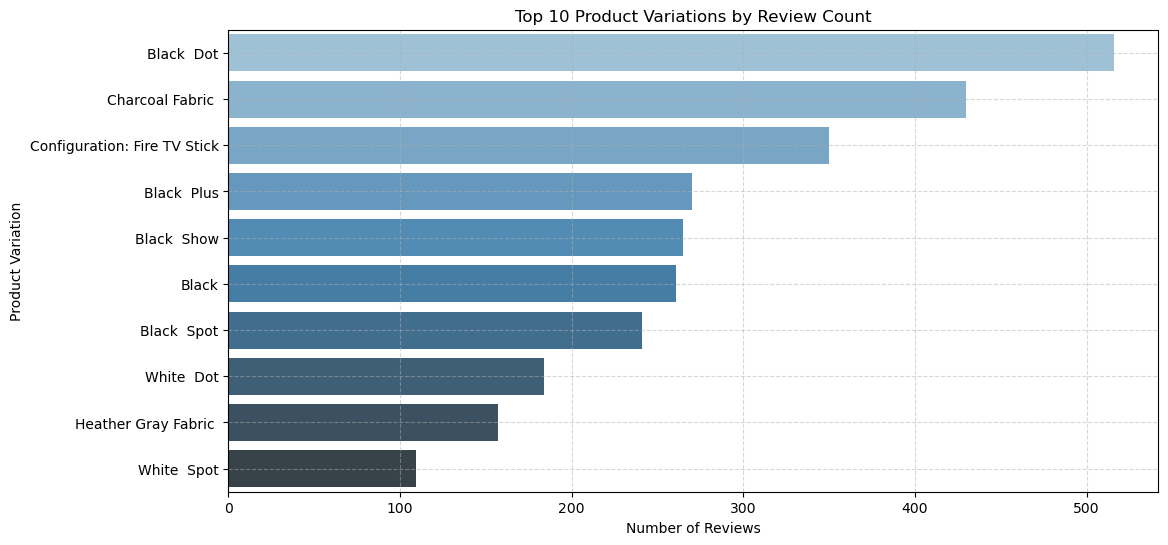

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x='review_count', y='variation', data=variation_stats, palette='Blues_d')
plt.title('Top 10 Product Variations by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Variation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [13]:
#- Most users rate the product 4 or 5 stars, indicating high satisfaction.
#- Around 93% of reviews are marked as positive feedback.
#- Most reviews are brief, showing that users leave short comments.
#- Variations like "Charcoal Fabric" and "Black Dot" are among the most popular and well-rated.
